
# Movie Recommendation System

© Explore Data Science Academy


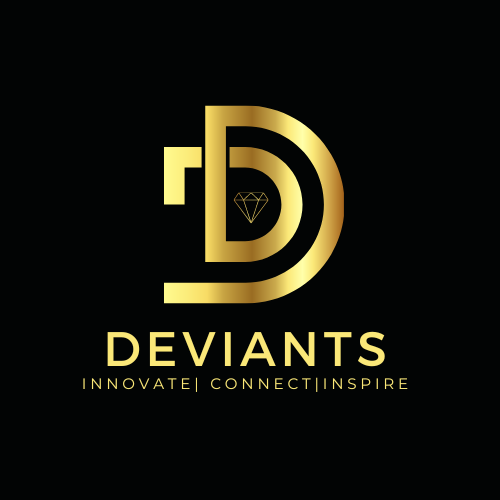


---
### Honour Code

We {**GM1_DEVIANTS**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### EDSA 2201 & 2207 unsupervised Learning hackathon

. . .
EDSA Honour Code.pdf



 **PROJECT OVERVIEW:  MOVIE RECOMMENDATION SYSTEM**


In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.
The team was tasked to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.
Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

The chief purpose of our system is to recommend movies to its users based on their viewing history and ratings that they provide. Collaborative filtering and content based filtering are the are prime approaches to provide recommendation to users. Both of them are best applicable in specific scenarios because of their respective ups and downs. Personalized recommendation engines help millions of people narrow the universe of potential films to fit their unique tastes.  Different people have different taste in movies, and this is not reflected in a single score that we see when we Google a movie. The main objective is that movie Recommendation System aims to recommend movies to users based on user-movie (item) ratings. Recommendation systems imitate this social process to enable quick filtering of the information on the web, and develop a complete Recommendation System than can manage every possible aspect required by the user. 

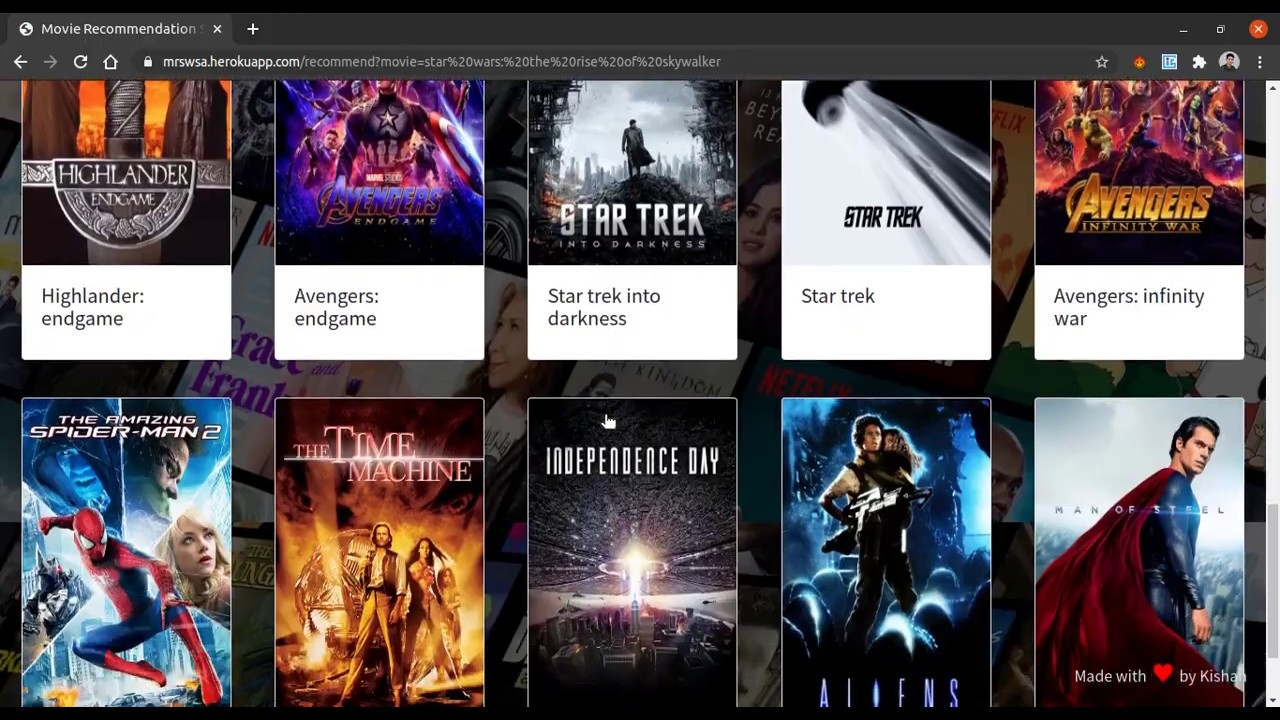


**PROBLEM STATEMENT**

The main objective of this project is to design the system that has a provision for user to select attributes on which he wants the movie to be recommended. This will be achieved using collaborative filtering based systems (CF based systems):Collaborative filtering system recommends items based on similarity measures between users and/or items. The system recommends items preferred by similar users. This is based on the scenario where a person asks his friends, who have similar tastes, to recommend him some movies. We selected this method because it is dependent on the relation between users which implies that it is content-independent. CF recommender systems can suggest serendipitous items by observing similar-minded people’s behavior. They can make real quality assessment of items by considering other peoples experience.The model can help users discover new interests. In isolation, the ML system may not know the user is interested in a given item, but the model might still recommend it because similar users are interested in that item.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#seven>8. References</a>


### **1.   Importing Packages**

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.1 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633724 sha256=c9400d613a2f8678c98034f7919c10d3120edacee9736a386cfc54598c5ac19c
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd

import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import BaselineOnly
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

### **2.   Loading datasets**

In [ ]:
! pip install -q kaggle

from google.colab import  files
files.upload()

#Create Kaggle Folder
!mkdir ~/.kaggle
#Copy Kaggle.json file to new folder
! cp kaggle.json ~/.kaggle/
#Grant Permissions
! chmod 600  ~/.kaggle/kaggle.json
#Datasets List
! kaggle datasets list

Saving kaggle.json to kaggle (2).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                       title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                        Data Science Job Salaries                            7KB  2022-06-15 08:59:12           5824        197  1.0              
surajjha101/bigbasket-entire-product-list-28k-datapoints  BigBasket Entire Product List (~28K datapoints)      6MB  2022-06-22 12:51:18           1794         84  1.0              
victorsoeiro/netflix-tv-shows-and-movies                  Netflix TV Shows and Movies                          2MB  2022-05-15 00:01:23          16448        479  1.0            

In [ ]:
#Download dataset
! kaggle competitions download -c edsa-movie-recommendation-2022

100% 239M/239M [00:01<00:00, 242MB/s]
100% 239M/239M [00:01<00:00, 214MB/s]


In [ ]:
 !unzip  edsa-movie-recommendation-2022.zip

Archive:  edsa-movie-recommendation-2022.zip
replace genome_scores.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:

genome_tags = pd.read_csv('genome_tags.csv')
imdb = pd.read_csv('imdb_data.csv')
links = pd.read_csv('links.csv')
tags = pd.read_csv('tags.csv')
test = pd.read_csv('test.csv')
movies= pd.read_csv('movies.csv')
train=pd.read_csv('train.csv')
genome_scores = pd.read_csv('genome_scores.csv')
sample_submission = pd.read_csv('sample_submission.csv')

### **3.    Exploratory data analysis**

<a href=#cont>Back to Table of Contents</a>

Exploratory data analysis (EDA) is a state of mind, a way of thinking about the data analysis and doing it. EDA emphasises using the visual display to reveal vital information about the examined data. EDA has been used to examine the distribution shape or the relationship between two variables; the aim is to overcome the problems identified by elementary techniques `(Hartwig & Dearing 1979, pp4-7)`. 

`The study revealed that the test dataset had 5682 observations, whereas the training dataset contained 33000 observations. There were no null values found in any of the features. However, the researcher observed that the text data had punctuation and text data in capital letters, requiring the researcher to do NLP preprocessing. The visulas relayed that all of the languages were spread evenly, which was predicted given that the goal of this research is to forecast the chance of the text belonging to one of South Africa's 11 official languages.`

In [ ]:
round(train['rating'].describe(), 1)

count    10000038.0
mean            3.5
std             1.1
min             0.5
25%             3.0
50%             3.5
75%             4.0
max             5.0
Name: rating, dtype: float64

Average rating in dataset: 3.5333951730983424


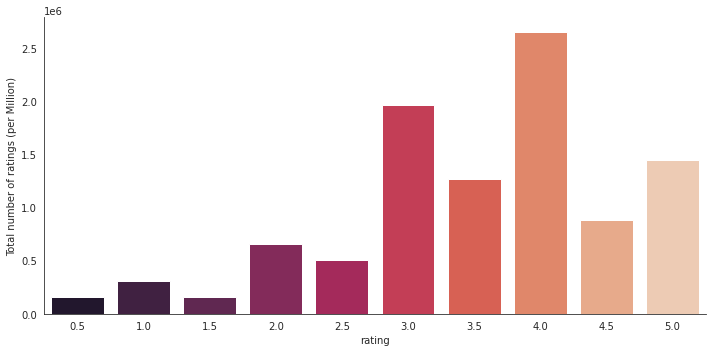

In [ ]:
with sns.axes_style('white'):
  ax = sns.factorplot("rating", data=train, aspect=2.0, kind='count',  palette="rocket")
  ax.set_ylabels("Total number of ratings (per Million)")
  print (f'Average rating in dataset: {np.mean(train["rating"])}')

### **Data pre-processing**

In [ ]:
train['rating'].value_counts()

4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5     880516
2.0     656821
2.5     505578
1.0     311213
1.5     159731
0.5     157571
Name: rating, dtype: int64

In [ ]:
train_copy = train.copy()
len(train_copy)

10000038

In [ ]:
# Reads the data with specicied ratings and loads the data
reader = Reader(rating_scale=(0.05, 5))
data = Dataset.load_from_df(train_copy[['userId', 'movieId', 'rating']], reader)

 <a id="Two"></a>
### **4. Data engineering**
<a href=#cont>Back to Table of Contents</a>


Data engineering is about creating and maintaining the underlying systems that collect and report data. Without data engineering, the collected data would be inconsistent and the information it tells us would not be beneficial `(Gray & Shenoy 2000, pp 3-10)`. At this stage, the researcher used the Countvectorizer to convert text to numerical data. 

### **5.   Modeling**


<a href=#cont>Back to Table of Contents</a>

A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing an algorithm that it can use to reason over and learn from those data (Song, Rinsternpart & Shmatikov 2017, pp 587-601).`The logistic regression, support vector model, decision trees, and random forest models were used in this study. The logistic regression model outperforms the other model with a 99.76 percent accuracy score on training data and an 87 percent accuracy score on unseen data.`

In [ ]:
bl = BaselineOnly()

trainset, testset = train_test_split(data, test_size = 0.1)

# train and test algorithm.
bl.fit(trainset)

predictions_b = bl.test(testset)

# Compute and print Root Mean Squared Error
r1 = accuracy.rmse(predictions_b, verbose=True)

Estimating biases using als...
RMSE: 0.8673


In [ ]:
# SVD model

svd = SVD(n_epochs = 30, n_factors = 400, init_std_dev = 0.02, random_state=42)

trainset, testset = train_test_split(data, test_size = 0.01)

# train and test algorithm.
svd.fit(trainset)

predictions_svd = svd.test(testset)

# Compute and print Root Mean Squared Error
r4 = accuracy.rmse(predictions_svd, verbose=True)

RMSE: 0.7938


In [ ]:
#Predicting the rating for each user and movie
ratings=[]
for x,y in test.itertuples(index=False):
    output=svd.predict(x,y)
    ratings.append(output)
    
output_df=pd.DataFrame(ratings)[['uid','iid','est']]
output_df['ID']=output_df['uid'].astype(str) + '_' + output_df['iid'].astype(str)
output_df=output_df[['ID','est']]
output_df.head()

,ID,est
0,1_2011,3.363525
1,1_4144,4.017553
2,1_5767,3.637114
3,1_6711,3.829227
4,1_7318,3.069961


### **6.   Model Perfomance**

In [ ]:
#Creating the "results" dataframe and convert to csv
results = pd.DataFrame({"Id":output_df['ID'],"rating": output_df['est']})
results.to_csv("SVD.csv", index=False)

In [ ]:
my_submission = pd.DataFrame({'id': results.Id, 'rating': results.rating})
my_submission.to_csv('submission.csv', index=False)

### **7.   Model explanation** **bold text**

### **8.   Refferences**


[(The articles are available on google scholar)](https://scholar.google.com/scholar?hl=en&as_sdt=0,5&q=what+is+data+engineering#d=gs_cit&t=1656164100451&u=%2Fscholar%3Fq%3Dinfo%3AV9k9GEPRiFUJ%3Ascholar.google.com%2F%26output%3Dcite%26scirp%3D0%26hl%3Den

Hartwig, F. and Dearing, B.E., 1979. Exploratory data analysis (No. 16). Sage.

Song, C., Ristenpart, T. and Shmatikov, V., 2017, October. Machine learning models that remember too much. In Proceedings of the 2017 ACM SIGSAC Conference on computer and communications security (pp. 587-601).

merge genome score relevance and train dataset 

In [ ]:
# ratings = train[['userId', 'movieId', 'rating']]

In [ ]:
# gens = genome_scores.groupby(['movieId'])['relevance'].mean().reset_index()

In [ ]:
# df_major = pd.merge(train, gens, on='movieId')

In [ ]:
            
# updated_df = pd.merge(df_major, imdb[['movieId', 'title_cast', 'plot_keywords']], how ='left', on ='movieId')


In [ ]:
# df_new = pd.merge(updated_df, movies[['movieId', 'genres']], how ='left', on ='movieId')


In [ ]:
# df_new['timestamp'] = pd.to_datetime(df_new["timestamp"])

In [ ]:
# df_new.dropna(subset=['title_cast', 'plot_keywords'], inplace=True)

In [ ]:
# df_new['genres'] = df_new.genres.str.split('|')
# df_new['title_cast'] = df_new.title_cast.str.split('|')
# df_new['plot_keywords'] = df_new.plot_keywords.str.split('|')


In [ ]:
# df_new

In [ ]:
# scaler = StandardScaler()

# scaler.fit(df_major)

In [ ]:
# scaled_data = scaler.transform(df_major) #all my values will be transfomd to same scale

In [ ]:
# pca = PCA(n_components=2) #2dimensional data
# pca.fit(scaled_data)
# x_pca = pca.transform(scaled_data)

In [ ]:
# #extracting the year from the title
# movies['year'] = movies.title.str.extract('(\(\d\d\d\d\))',expand=False)
# #removing the parenthesis
# movies['year'] = movies.year.str.extract('(\d\d\d\d)',expand=False)



In [ ]:
# #remove the year from the title
# movies['title'] = movies.title.str.replace('(\(\d\d\d\d\))', '')

In [ ]:
# #Strip function get rid of the white spaces present
# movies['title'] = movies['title'].apply(lambda x: x.strip())

In [ ]:
# #first in dimension reduction you standardize
# df_major = pd.merge(ratings, movies, on='movieId')

In [ ]:
# df_major.head()

In [ ]:
# df_major.tail()

In [ ]:
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stop = stopwords.words('english')

In [ ]:
# import string 
# import re

In [ ]:
# # define a function for extracting the punctuations

# def check_find_punctuations(text):
    
#     # regular expression containing
#     # all punctuation
#     result = re.findall(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*', 
#                         text)
      
#     # form a string
#     string = "".join(result)
      
#     # list of strings return
#     return list(string)
    
# # creating new column name
# # as a punctuation_used and 
# # applying user defined function
# # on each rows of Comments column
# df_major['punctuation_used'] = df_major['title'].apply(
#                          lambda x : check_find_punctuations(x)
#                          )

In [ ]:
# df_major.head()

In [ ]:
# df_major = df_major.drop('punctuation_used', axis=1)
# df_major.head()

In [ ]:
# df_major = df_major.drop('year', axis=1)

In [ ]:
# df_major['title'] = df_major['title'].str.replace(r'[^\w\s]+', '')

In [ ]:
# df_major.tail()

In [ ]:
# # keep last duplicate row
# df_mafor = df_major.drop_duplicates( keep='last')

In [ ]:
# duplicate = df_major[df_major.duplicated()]
# print(duplicate)

### **Data** **engeneering** 

Convert the title to numeric

In [ ]:
# #Convert the title to numeric

# cat_columns = df_major.select_dtypes(['object']).columns
# df_major[cat_columns] = df_major[cat_columns].apply(lambda x: pd.factorize(x)[0])


Create y variable

In [ ]:
# y = df_major[['rating']].astype(int)

Vectorize the data

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# # get bag of words features in sparse format
# cv = CountVectorizer(min_df=0., max_df=1.)
# cv_matrix = cv.fit_transform(df_major)

Standardize the data

Dimensionality reduction to 2 dimensions using pca

Dimensionality reduction using T-SNE

now we can transform data into its first two principal components

In [ ]:
!pip install scikit-surprise

In [ ]:
reader = Reader(rating_scale=(1,5))

In [ ]:
train_df = Dataset.load_from_df(df_major[['userId', 'movieId', 'rating']], reader)

In [ ]:
train_set = train_df.build_full_trainset()

In [ ]:
svd= SVD(n_epochs=10, n_factors=100, biased=True, random_state=15, verbose=True) 

In [ ]:
svd.fit(train_set)

In [ ]:
predictions = []
for i, row in test.iterrows():
    prediction_svd= (svd.predict(row.userId, row.movieId))
    pred_svd = prediction_svd[3]
    predictions.append(pred_svd)

In [ ]:
test['Id'] = test['userId'].map(str) +'_'+ test['movieId'].map(str)
results = pd.DataFrame({"Id":test['Id'],"rating": predictions})
results.to_csv("output.csv", index=False)

Split the data into train and test

In [ ]:
# from sklearn.linear_model import LogisticRegression

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state = 42)

## **Fit the model**

# New Section

In [ ]:
# model = LogisticRegression()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

Model2

In [ ]:
# from sklearn.naive_bayes import GaussianNB

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# mode2 = KNeighborsClassifier(n_neighbors=2)

# # Train the model using the training sets
# mode2.fit(X_train, y_train)

In [ ]:
# mode2.score(X_test, y_test)

In [ ]:

# model2_pred = model2.predict(X_test)

In [ ]:
# from sklearn.metrics import accuracy_score
# #Calculate the accuracy of the model
# KN_acc = accuracy_score(mode2_pred, y_test)

# #print accuracy
# print("Test accuracy: {:.2f}%".format(model2_pred*100))

CSV

In [ ]:
#  from sklearn.ensemble import RandomForestClassifier

In [ ]:
# clf=RandomForestClassifier()
# clf.fit(X_train,y_train)

In [ ]:
# clf.score(X_test, y_test)

In [ ]:
# from sklearn.mixture import GaussianMixture
# EM = GaussianMixture()
# Em.fit(X_train, y_train)

In [ ]:
# EM.score(X_test, y_test)

In [ ]:
# k = 2

Model

In [ ]:
# km = KMeans(n_clusters=K, random_state=42)
# km.fit(X_train, y_train)
# km.score(X_test, y_test)